In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data from the file
with open("../outputs/scores.json", "r", encoding="utf-8") as f:
    data = json.load(f)
    all_scores = data["scores"]
    all_rules = data["rules"]
    all_index_true = data["true_obs_index"]
    algorithm_used = data["algorithm_used"]
    all_transition_type = data["transition_type"]

In [3]:
#Replace None by "None"
all_rules = ["None" if x is None else x for x in all_rules]
algorithm_used = ["None" if x is None else x for x in algorithm_used]

In [4]:
# Get the total number of transitions
n_transitions = sum([len(scores) for scores in all_scores])

In [10]:
#Check if higher score is reached on the true observation for each rule
accuracies = {"Top 1":[0 for _ in range(len(all_rules))], "Top 3":[0 for _ in range(len(all_rules))], "Top 5":[0 for _ in range(len(all_rules))], "Top 10":[0 for _ in range(len(all_rules))]}
for i_rule in range(len(all_rules)):
    for i_episode, score_episode in enumerate(all_scores):
        for i_transition, score_transition in enumerate(score_episode):
            true_score = score_transition[i_rule][all_index_true[i_episode][i_transition]]
            sorted_score_transition = sorted(score_transition[i_rule], reverse=True)
            index_true = sorted_score_transition.index(true_score)
            if index_true < 10:
                accuracies["Top 10"][i_rule] += 1
                if index_true < 5:
                    accuracies["Top 5"][i_rule] += 1
                    if index_true < 3:
                        accuracies["Top 3"][i_rule] += 1
                        if index_true ==0:
                            accuracies["Top 1"][i_rule] += 1                
accuracies = {key: [value/n_transitions for value in values] for key, values in accuracies.items()}

In [11]:
#Regroup success rate per algorithm
accuracies_per_algo = {}
for i_algo, algo in enumerate(algorithm_used):
    if algo not in accuracies_per_algo:
        accuracies_per_algo[algo] = {"Top 1": [], "Top 3": [], "Top 5": [], "Top 10": []}
    accuracies_per_algo[algo]["Top 1"].append(accuracies["Top 1"][i_algo])
    accuracies_per_algo[algo]["Top 3"].append(accuracies["Top 3"][i_algo])
    accuracies_per_algo[algo]["Top 5"].append(accuracies["Top 5"][i_algo])
    accuracies_per_algo[algo]["Top 10"].append(accuracies["Top 10"][i_algo])

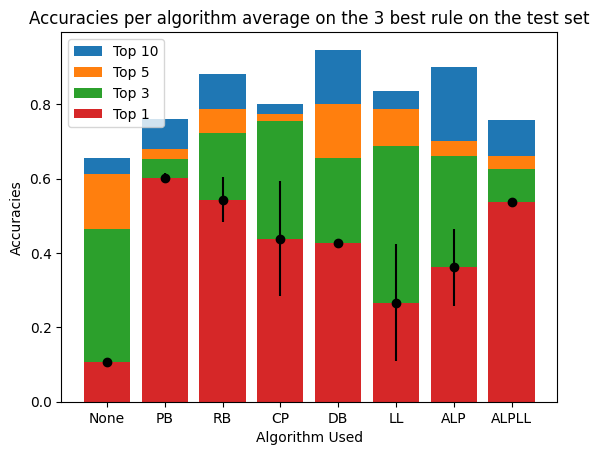

In [16]:
#Plot bar plot of success rate per algorithm
plt.figure()
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 10"]) for rate in accuracies_per_algo.values()], label="Top 10")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 5"]) for rate in accuracies_per_algo.values()], label="Top 5")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 3"]) for rate in accuracies_per_algo.values()], label="Top 3")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo.values()], label="Top 1")
plt.legend()
plt.errorbar(accuracies_per_algo.keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo.values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo.values()], fmt='o', color='black')
plt.title("Accuracies per algorithm average on the 3 best rule on the test set")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracies")
plt.show()

# Results per transition type

In [ ]:
unique_transition_type = ["nothing", "standing", "holding1", "holding2","transformP", "transformSH", "transformBH"]
all_accuracies = {key:{"Top 1":[0 for _ in range(len(all_rules))], "Top 3":[0 for _ in range(len(all_rules))], "Top 5":[0 for _ in range(len(all_rules))], "Top 10":[0 for _ in range(len(all_rules))]} for key in unique_transition_type}
n_transitions_per_type = {key:0 for key in unique_transition_type}

#Check if higher score is reached on the true observation for each rule
for i_episode, score_episode in enumerate(all_scores):
    for i_transition, score_transition in enumerate(score_episode):
        for i_rule in range(len(all_rules)):
            transition_type = all_transition_type[i_episode][i_transition][all_index_true[i_episode][i_transition]]
            true_score = score_transition[i_rule][all_index_true[i_episode][i_transition]]
            sorted_score_transition = sorted(score_transition[i_rule], reverse=True)
            index_true = sorted_score_transition.index(true_score)
            if index_true < 10:
                all_accuracies[transition_type]["Top 10"][i_rule] += 1
                if index_true < 5:
                    all_accuracies[transition_type]["Top 5"][i_rule] += 1
                    if index_true < 3:
                        all_accuracies[transition_type]["Top 3"][i_rule] += 1
                        if index_true ==0:
                            all_accuracies[transition_type]["Top 1"][i_rule] += 1
        n_transitions_per_type[transition_type] +=1                

    
for transition_type in all_accuracies.keys():
    for key, values in all_accuracies[transition_type].items():
        all_accuracies[transition_type][key] = [value/n_transitions_per_type[transition_type] for value in values]

In [55]:
#Regroup success rate per algorithm
accuracies_per_algo_per_type = {key:{} for key in unique_transition_type}
for transition_type in unique_transition_type:
    for i_algo, algo in enumerate(algorithm_used):
        if algo not in accuracies_per_algo_per_type[transition_type]:
            accuracies_per_algo_per_type[transition_type][algo] = {"Top 1": [], "Top 3": [], "Top 5": [], "Top 10": []}
        accuracies_per_algo_per_type[transition_type][algo]["Top 1"].append(all_accuracies[transition_type]["Top 1"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 3"].append(all_accuracies[transition_type]["Top 3"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 5"].append(all_accuracies[transition_type]["Top 5"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 10"].append(all_accuracies[transition_type]["Top 10"][i_algo])

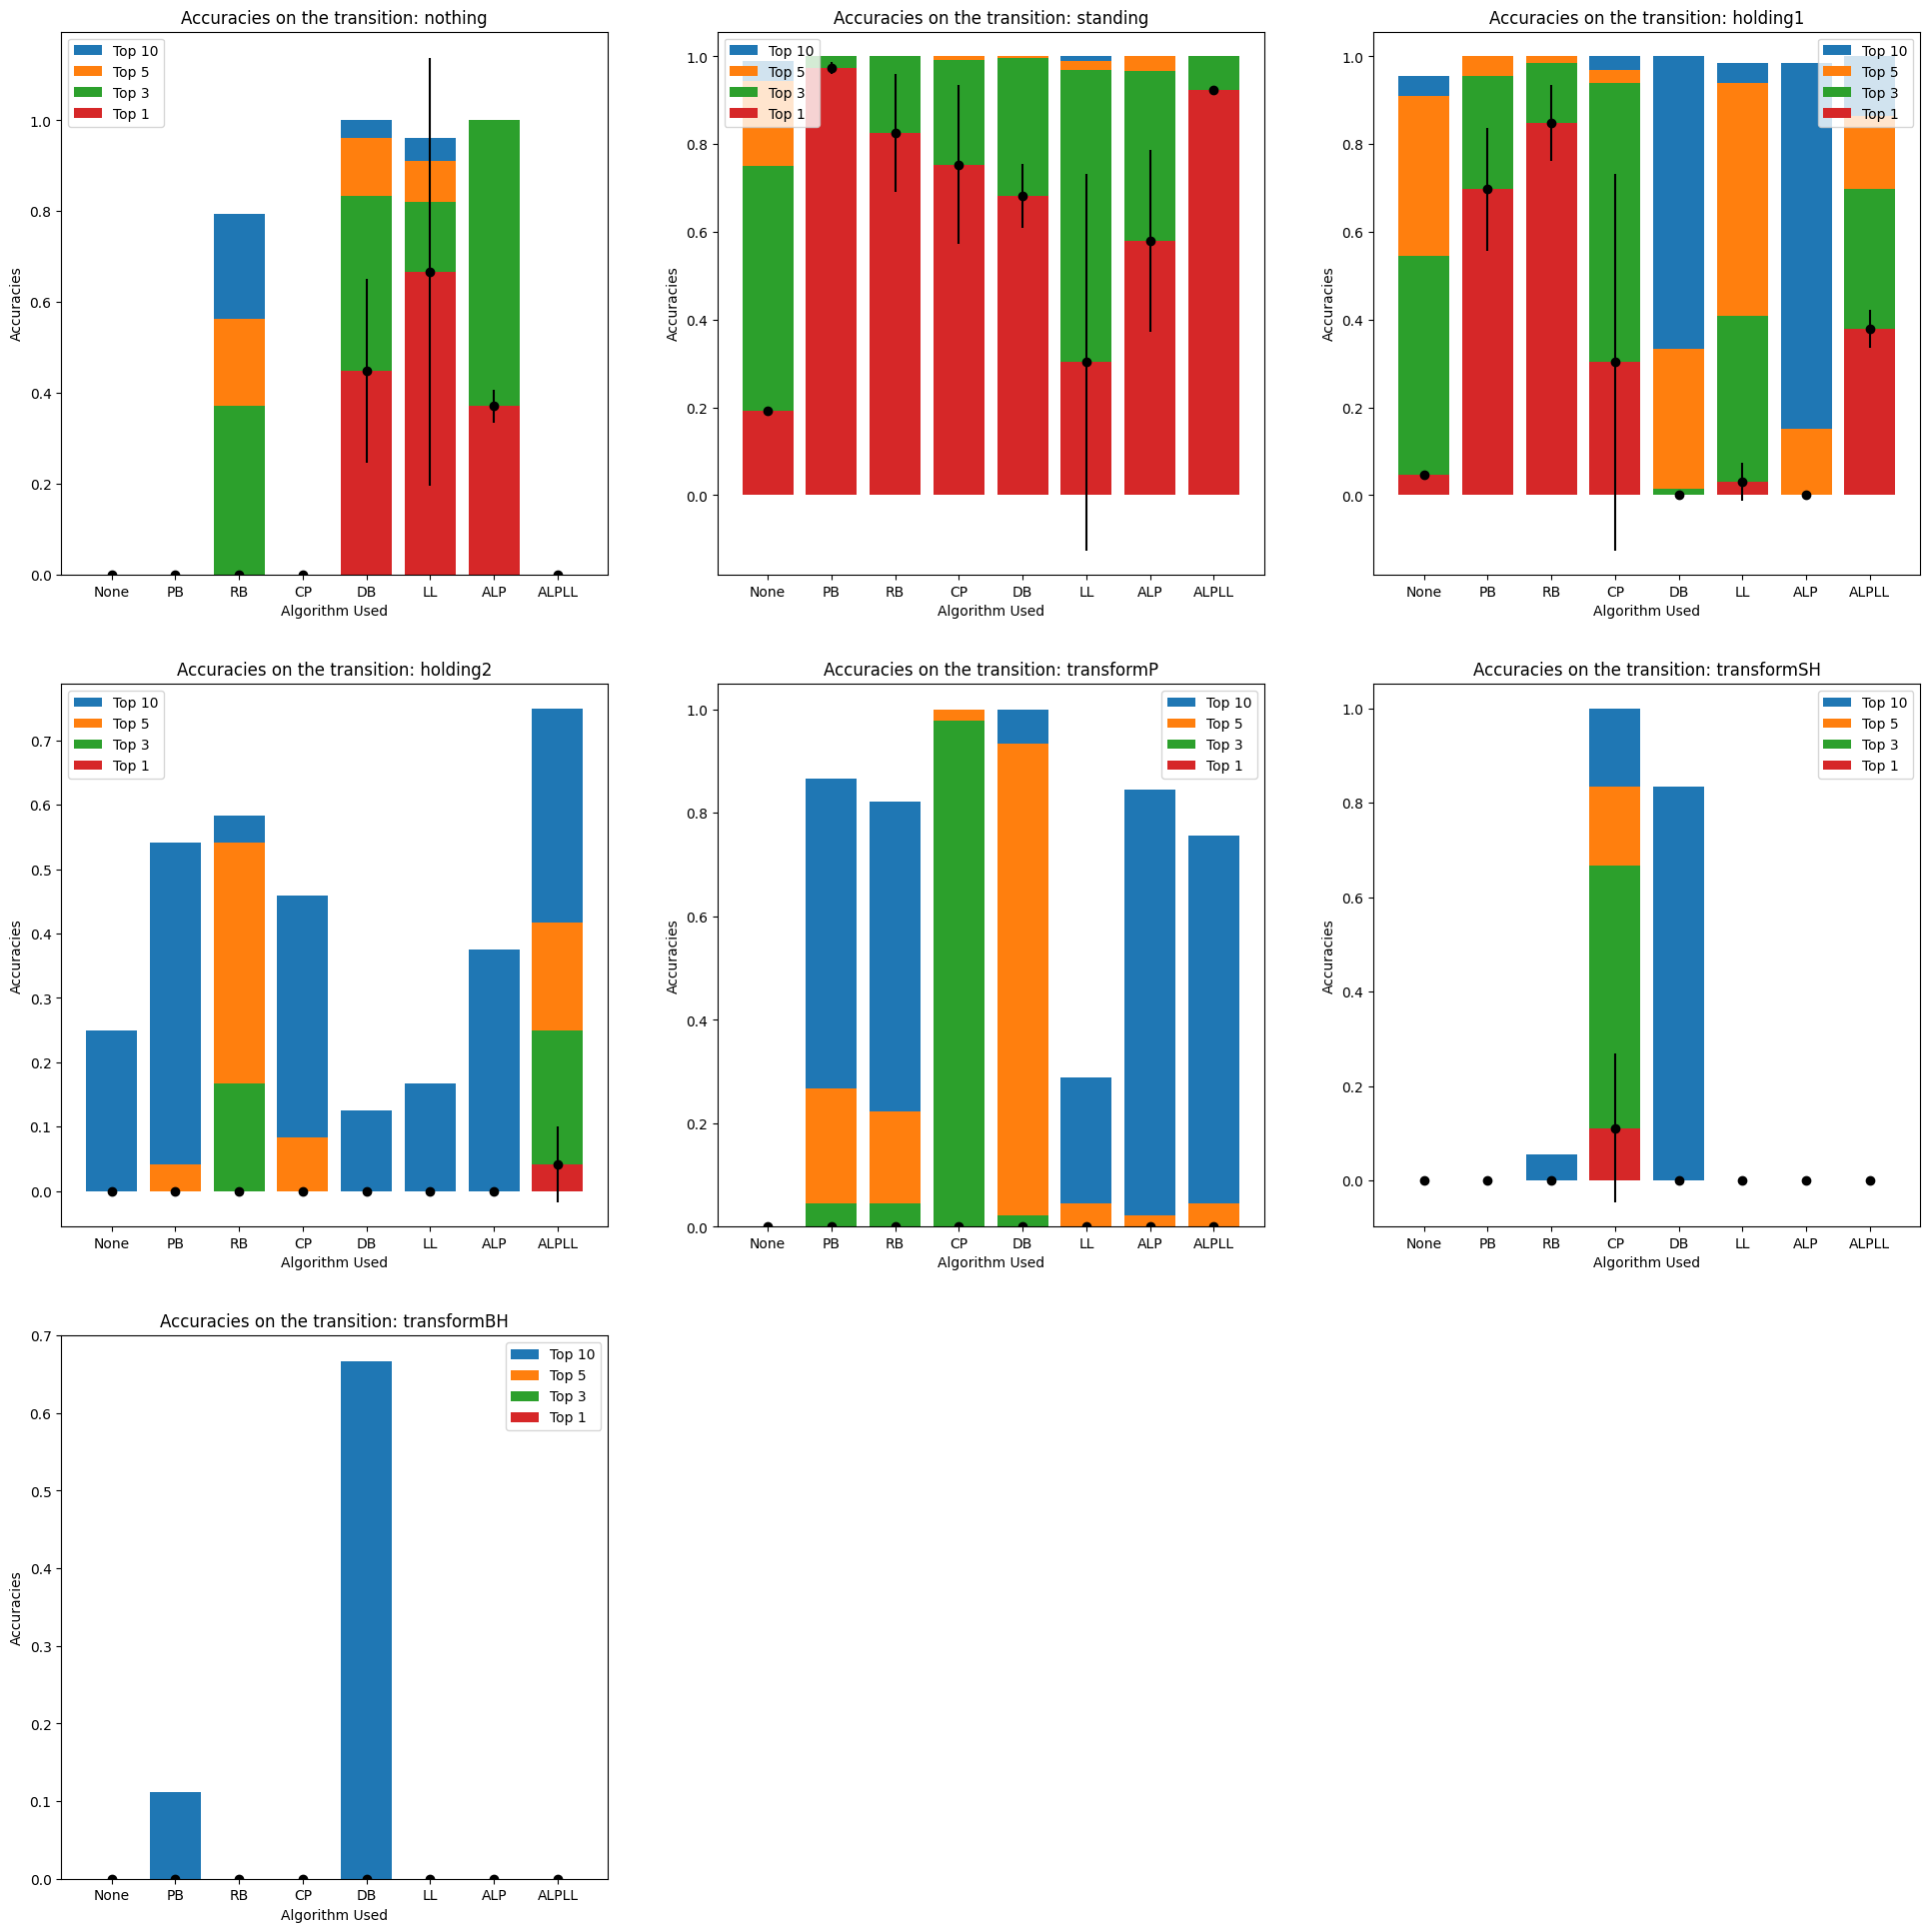

In [57]:
#Plot bar plot of success rate per algorithm for each transition type
plt.figure(figsize=(24,24))
for i_type, transition_type in enumerate(unique_transition_type):
    plt.subplot(3,3,i_type+1)
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 10"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 10")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 5"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 5")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 3"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 3")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 1")
    plt.legend()
    plt.errorbar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], fmt='o', color='black')
    plt.title(f"Accuracies on the transition: {transition_type}")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
plt.show()